In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# .map('{:,.2f}'.format) - - - for big numbers

In [2]:
data = yf.download('AAPL AMZN MSFT BABA TSLA IBM JD SPY', start='2020-01-01')
amzn = yf.Ticker('amzn')
aapl = yf.Ticker('aapl')
msft = yf.Ticker('msft')
baba = yf.Ticker('baba')
tsla = yf.Ticker('tsla')
ibm = yf.Ticker('ibm')
jd = yf.Ticker('jd')
spy = yf.Ticker('spy')

[*********************100%***********************]  8 of 8 completed


<AxesSubplot:>

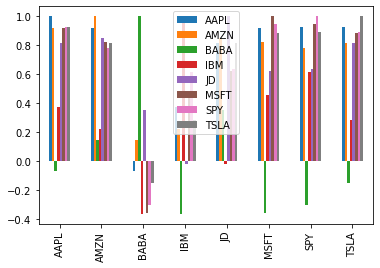

In [3]:
data['Close'].corr().plot(kind='bar')

In [4]:
data['Adj Close'].iloc[252:].corr()

,AAPL,AMZN,BABA,IBM,JD,MSFT,SPY,TSLA
AAPL,1.000000,0.692149,-0.687687,0.220094,-0.293102,0.865129,0.797532,0.492742
AMZN,0.692149,1.000000,-0.337193,0.365997,-0.345648,0.608187,0.632032,0.161146
BABA,-0.687687,-0.337193,1.000000,-0.501084,0.595164,-0.846914,-0.848609,-0.258127
IBM,0.220094,0.365997,-0.501084,1.000000,-0.853999,0.375868,0.586448,-0.441687
JD,-0.293102,-0.345648,0.595164,-0.853999,1.000000,-0.456712,-0.618920,0.337581
MSFT,0.865129,0.608187,-0.846914,0.375868,-0.456712,1.000000,0.958908,0.475560
SPY,0.797532,0.632032,-0.848609,0.586448,-0.618920,0.958908,1.000000,0.297600
TSLA,0.492742,0.161146,-0.258127,-0.441687,0.337581,0.475560,0.297600,1.000000


<AxesSubplot:>

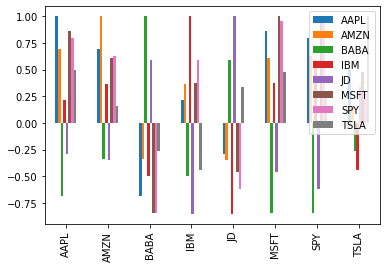

In [5]:
data['Adj Close'].iloc[252:].corr().plot(kind='bar')

In [9]:
holdings = ['SPXS', 'KWEB']
weight = [.7, .3]
data = yf.download(holdings, start='2021-1-1')

[*********************100%***********************]  2 of 2 completed


In [10]:
x = data['Adj Close'].pct_change()
ret = (x*weight).sum(axis=1)
cumulative = (ret+1).cumprod()

<AxesSubplot:xlabel='Date'>

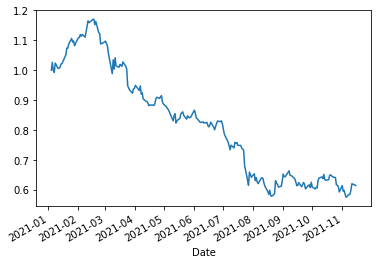

In [11]:
cumulative.plot()

In [12]:
print(np.std(ret))

0.01962970504318596


In [14]:
annual_std = np.std(ret) * np.sqrt(252)
print(annual_std)

0.31161190712292275


In [15]:
sharpe = (np.mean(ret) / np.std(ret)) * np.sqrt(252)
print(sharpe)

-1.6370882215590201


In [17]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

wts = np.random.uniform(size=len(x.columns))
wts = wts/np.sum(wts)

In [24]:
count = 500
for k in range(0, count):
    wts = np.random.uniform(size=len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    # returns
    mean_ret = (x.mean() * wts).sum() * 252

    # volatility
    ret = (x*wts).sum(axis=1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)

    # Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret)) * np.sqrt(252)
    p_sharpe.append(sharpe)

In [25]:
max_ind = np.argmax(p_sharpe)

# MAX Sharpe ratio
print(p_sharpe[max_ind])

# weights
print(p_weights[max_ind])

-0.7811956011159696
[0.23578407 0.76421593]


<AxesSubplot:>

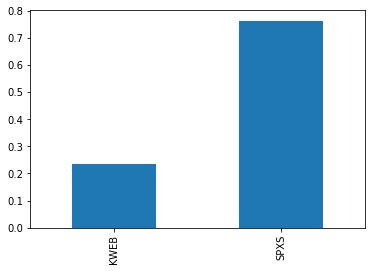

In [26]:
s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

ValueError: x and y must be the same size

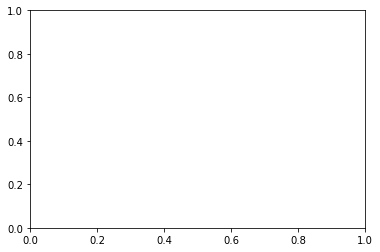

In [27]:
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()